In [43]:
from requests import get
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, ttest_rel

plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.linewidth'] = 0.8
print(plt.style.available)
plt.style.use('seaborn')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [44]:
metric = 'ndcg'
cutoff = '10'
n_questions = 10

#data = get(f'https://mindreader.tech/spectate/results/170k_equal_20/{metric}/{cutoff}').json()
data = get(f'http://localhost:5000/spectate/results/equal/{metric}/{cutoff}').json()

models = sorted([key for key in data.keys()], reverse=True)

print(models)

['top-pop', 'pop-ppr-joint-rec', 'pop-ppr-joint', 'greedy-ppr-kg-rec', 'greedy-ppr-kg', 'greedy-ppr-joint-rec', 'greedy-ppr-joint', 'greedy-ppr-collab-rec', 'greedy-ppr-collab']


In [45]:
unique_models = set([model.replace('-rec', '') for model in models])
model_color_map = {model: f'C{i}' for i, model in enumerate(unique_models)}
print(model_color_map)

{'greedy-ppr-kg': 'C0', 'top-pop': 'C1', 'pop-ppr-joint': 'C2', 'greedy-ppr-collab': 'C3', 'greedy-ppr-joint': 'C4'}


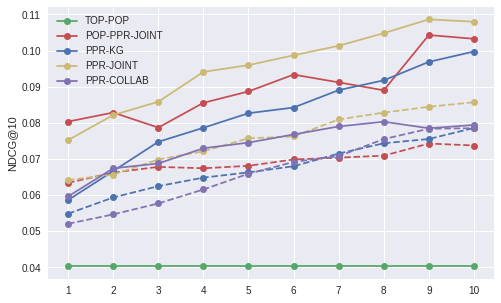

In [46]:
fig, ax = plt.subplots(figsize=(8, 5))

def fmt(name):
    return name.replace('greedy-', '').upper()

for model in models:
    x = np.arange(1, 11, 1)
    y = [np.mean(data[model][interview_length - 1]) for interview_length in x]
    
    is_rec = model.endswith('rec')
    
    color = model_color_map[model.replace('-rec', '')] if is_rec else model_color_map[model]
    linestyle = 'dashed' if is_rec else 'solid'
    
    plt.plot(x, y, label=fmt(model) if not is_rec else None, marker='o', linestyle=linestyle, color=color)

plt.ylabel(f'{metric.upper()}@{cutoff}')

plt.xticks(x)
plt.legend()
plt.savefig('lineplot.pdf', bbox_inches='tight')
plt.show()